In [2]:
import os

def count_files(directory):
  """Counts the number of files in a given directory.

  Args:
    directory: The path to the directory.

  Returns:
    The number of files in the directory.
  """

  num_files = 0
  for root, _, files in os.walk(directory):
    num_files += len(files)
  return num_files

# Example usage:
directory_path = "./dataset/images"
file_count = count_files(directory_path)
print("Number of files:", file_count)


Number of files: 64


In [3]:
import os

def count_files(directory):
  """Counts the number of files in a given directory.

  Args:
    directory: The path to the directory.

  Returns:
    The number of files in the directory.
  """

  num_files = 0
  for root, _, files in os.walk(directory):
    num_files += len(files)
  return num_files

# Example usage:
directory_path = "./dataset/labels"
file_count = count_files(directory_path)
print("Number of files:", file_count)


Number of files: 64


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET


KeyboardInterrupt: 

In [ ]:
# Define directories
image_dir = './dataset/images'
label_dir = './dataset/labels'

# Function to parse XML and extract label
def parse_xml(label_path):
    tree = ET.parse(label_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        label = obj.find('name').text
        return 1 if label == 'varroa_mite' else 0

# Load images and labels
def load_data(image_dir, label_dir):
    images = []
    labels = []
    
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        label_path = os.path.join(label_dir, img_name.replace('.jpg', '.xml'))
        
        # Load image
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        images.append(img)
        
        # Load label
        label = parse_xml(label_path)
        labels.append(label)
    
    return np.array(images), np.array(labels)

images, labels = load_data(image_dir, label_dir)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


e:\AI Projects\Verona_Mites\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))


ValueError: Unknown variable: <KerasVariable shape=(3, 3, 3, 32), dtype=float32, path=sequential/conv2d/kernel>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test accuracy: 1.0


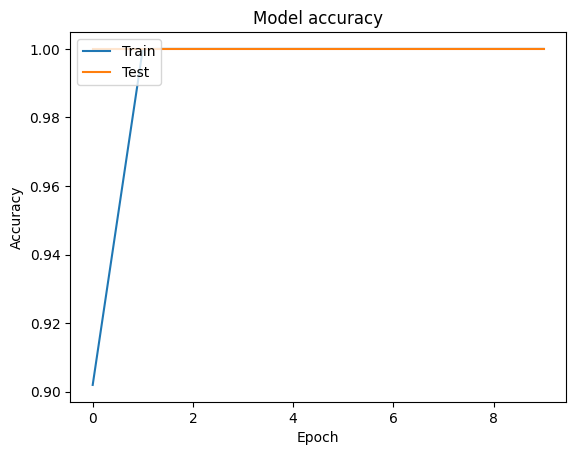

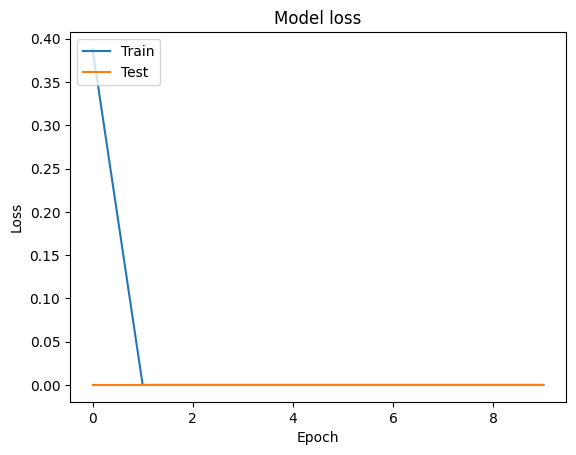

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
model.save('varroa_mite_detector.h5')


In [ ]:
# Load the model
model = tf.keras.models.load_model('varroa_mite_detector.h5')

# Predict on new images
def predict(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    
    prediction = model.predict(img)
    return np.argmax(prediction, axis=1)

# Example usage
image_path = './dataset/images/IMG_5994.jpg'
prediction = predict(image_path, model)
print('Prediction:', 'Varroa mite' if prediction == 1 else 'No mite')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Prediction: No mite


In [ ]:
import os
import tensorflow as tf
import numpy as np

# Load the model
model = tf.keras.models.load_model('varroa_mite_detector.h5')

def predict_image(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    return np.argmax(prediction, axis=1)

# Function to process all images in a folder
def process_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            prediction = predict_image(image_path, model)
            print(f"Filename: {filename}, Prediction: {'Varroa mite' if prediction == 1 else 'No mite'}")

# Example usage
image_folder = './dataset/images'
process_images(image_folder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
Filename: IMG_5536.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Filename: IMG_5559.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Filename: IMG_5560.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Filename: IMG_5561.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Filename: IMG_5562.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Filename: IMG_5582.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Filename: IMG_5583.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Filename: IMG_5584.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Filename: IMG_5585.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Filename: IMG_5629.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Filename: IMG_5630.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Filename: IMG_5631.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━

In [5]:
import os
import tensorflow as tf
import numpy as np

# Load the model
model = tf.keras.models.load_model('mite_classifier_model.h5')

def predict_image(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    return np.argmax(prediction, axis=1)

# Function to process all images in a folder
def process_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            prediction = predict_image(image_path, model)
            print(f"Filename: {filename}, Prediction: {'Varroa mite' if prediction == 1 else 'No mite'}")

# Example usage
image_folder = './dataset/images'
process_images(image_folder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Filename: IMG_5536.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Filename: IMG_5559.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Filename: IMG_5560.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Filename: IMG_5561.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Filename: IMG_5562.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Filename: IMG_5582.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Filename: IMG_5583.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Filename: IMG_5584.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Filename: IMG_5585.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Filename: IMG_5629.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Filename: IMG_5630.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Filename: IMG_5631.jpg, Prediction: No mite
1/1 ━━━━━━━━━━━

In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

# Assuming the model is in the TensorFlow SavedModel format
model_path = './models/0070_fasterrcnn_resnet50_fpn_th50/modelo.bin'  # Directory containing saved_model.pb and variables/

# Load the model
model = tf.keras.models.load_model(model_path)

# Define a function to parse XML and extract label (for testing purposes)
def parse_xml(label_path):
    tree = ET.parse(label_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        label = obj.find('name').text
        return 1 if label == 'varroa_mite' else 0

# Function to preprocess a single image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to make prediction on a single image
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction, axis=1)
    return 'Varroa mite' if predicted_class == 1 else 'No mite'

# Example usage
image_path = './dataset/images/IMG_5994.jpg'
prediction = predict_image(image_path, model)
print('Prediction:', prediction)


ValueError: File format not supported: filepath=./models/0070_fasterrcnn_resnet50_fpn_th50/modelo.bin. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(./models/0070_fasterrcnn_resnet50_fpn_th50/modelo.bin, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [ ]:
import torch
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import xml.etree.ElementTree as ET

# Load the PyTorch model
model_path = './models/0070_fasterrcnn_resnet50_fpn_th50/modelo.bin'
model = torch.load(model_path, map_location=torch.device('cpu'))
model.eval()

# Function to preprocess a single image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img = image.img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Define a function to parse XML and extract label (for testing purposes)
def parse_xml(label_path):
    tree = ET.parse(label_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        label = obj.find('name').text
        return 1 if label == 'varroa_mite' else 0

# Convert PyTorch model predictions to numpy
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    img = torch.tensor(img).permute(0, 3, 1, 2).float()  # Convert to PyTorch tensor and reshape
    with torch.no_grad():
        prediction = model(img)
    predicted_class = np.argmax(prediction.numpy(), axis=1)
    return 'Varroa mite' if predicted_class == 1 else 'No mite'

# Example usage
image_path = 'path_to_new_image.jpg'
prediction = predict_image(image_path, model)
print('Prediction:', prediction)


AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [6]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Function to get the FasterRCNN model with ResNet50 backbone
def get_model():
    # Load a pre-trained FasterRCNN model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
    
    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    
    # Replace the pre-trained head with a new one (2 classes: background and varroa mite)
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    
    return model


# Load the model architecture
model = get_model()

# Load the state dictionary
model_path = './models/0070_fasterrcnn_resnet50_fpn_th50/modelo.bin'
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model.eval()


import numpy as np
from PIL import Image
import os
import xml.etree.ElementTree as ET
from torchvision import transforms

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

# Function to parse XML and extract label (for testing purposes)
def parse_xml(label_path):
    tree = ET.parse(label_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        label = obj.find('name').text
        return 1 if label == 'varroa_mite' else 0

# Convert PyTorch model predictions to numpy
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    with torch.no_grad():
        prediction = model(img)
    
    # Extract the class with the highest score
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    
    # Thresholding based on a score (for instance, 0.5)
    threshold = 0.5
    indices = np.where(scores > threshold)[0]
    
    # Check if any labels indicate the presence of Varroa mite (class 1)
    has_varroa_mite = any(labels[idx] == 1 for idx in indices)
    
    return 'Varroa mite' if has_varroa_mite else 'No mite'



e:\AI Projects\Verona_Mites\env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\AI Projects\Verona_Mites\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [7]:
# Example usage
image_path = './dataset/images/IMG_5994.jpg'
prediction = predict_image(image_path, model)
print('Prediction:', prediction)

Prediction: No mite


In [8]:
import os


def process_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            prediction = predict_image(image_path, model)
            print(f"Filename: {filename}, Prediction: {prediction}")

# Example usage
image_folder = './dataset/images'
process_images(image_folder)


Filename: IMG_5536.jpg, Prediction: No mite
Filename: IMG_5559.jpg, Prediction: No mite
Filename: IMG_5560.jpg, Prediction: No mite
Filename: IMG_5561.jpg, Prediction: No mite
Filename: IMG_5562.jpg, Prediction: No mite
Filename: IMG_5582.jpg, Prediction: No mite
Filename: IMG_5583.jpg, Prediction: No mite
Filename: IMG_5584.jpg, Prediction: No mite
Filename: IMG_5585.jpg, Prediction: No mite
Filename: IMG_5629.jpg, Prediction: No mite
Filename: IMG_5630.jpg, Prediction: No mite
Filename: IMG_5631.jpg, Prediction: No mite
Filename: IMG_5651.jpg, Prediction: No mite
Filename: IMG_5652.jpg, Prediction: No mite
Filename: IMG_5654.jpg, Prediction: No mite
Filename: IMG_5674.jpg, Prediction: No mite
Filename: IMG_5675.jpg, Prediction: No mite
Filename: IMG_5676.jpg, Prediction: No mite
Filename: IMG_5677.jpg, Prediction: No mite
Filename: IMG_5699.jpg, Prediction: No mite
Filename: IMG_5700.jpg, Prediction: No mite
Filename: IMG_5701.jpg, Prediction: No mite
Filename: IMG_5702.jpg, Predicti

In [9]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Function to get the FasterRCNN model with ResNet50 backbone
def get_model():
    # Load a pre-trained FasterRCNN model
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
    
    # Get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    
    # Replace the pre-trained head with a new one (2 classes: background and varroa mite)
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    
    return model


# Load the model architecture
model = get_model()

# Load the state dictionary
model_path = './models/0094_fasterrcnn_resnet50_fpn_deblurGAN/modelo.bin'
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model.eval()


import numpy as np
from PIL import Image
import os
import xml.etree.ElementTree as ET
from torchvision import transforms

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

# Function to parse XML and extract label (for testing purposes)
def parse_xml(label_path):
    tree = ET.parse(label_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        label = obj.find('name').text
        return 1 if label == 'varroa_mite' else 0

# Convert PyTorch model predictions to numpy
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    with torch.no_grad():
        prediction = model(img)
    
    # Extract the class with the highest score
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    
    # Thresholding based on a score (for instance, 0.5)
    threshold = 0.5
    indices = np.where(scores > threshold)[0]
    
    # Check if any labels indicate the presence of Varroa mite (class 1)
    has_varroa_mite = any(labels[idx] == 1 for idx in indices)
    
    return 'Varroa mite' if has_varroa_mite else 'No mite'

# Example usage
image_path = './dataset/images/IMG_5994.jpg'
prediction = predict_image(image_path, model)
print('Prediction:', prediction)

Prediction: No mite


In [10]:
import os


def process_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            prediction = predict_image(image_path, model)
            print(f"Filename: {filename}, Prediction: {prediction}")

# Example usage
image_folder = './dataset/images'
process_images(image_folder)


Filename: IMG_5536.jpg, Prediction: No mite
Filename: IMG_5559.jpg, Prediction: No mite
Filename: IMG_5560.jpg, Prediction: No mite
Filename: IMG_5561.jpg, Prediction: No mite
Filename: IMG_5562.jpg, Prediction: No mite
Filename: IMG_5582.jpg, Prediction: No mite
Filename: IMG_5583.jpg, Prediction: No mite
Filename: IMG_5584.jpg, Prediction: No mite
Filename: IMG_5585.jpg, Prediction: No mite
Filename: IMG_5629.jpg, Prediction: No mite
Filename: IMG_5630.jpg, Prediction: No mite
Filename: IMG_5631.jpg, Prediction: No mite
Filename: IMG_5651.jpg, Prediction: No mite
Filename: IMG_5652.jpg, Prediction: No mite
Filename: IMG_5654.jpg, Prediction: No mite
Filename: IMG_5674.jpg, Prediction: No mite
Filename: IMG_5675.jpg, Prediction: No mite
Filename: IMG_5676.jpg, Prediction: No mite
Filename: IMG_5677.jpg, Prediction: No mite
Filename: IMG_5699.jpg, Prediction: No mite
Filename: IMG_5700.jpg, Prediction: No mite
Filename: IMG_5701.jpg, Prediction: No mite
Filename: IMG_5702.jpg, Predicti

In [11]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models import resnet18
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

# Function to create the Faster R-CNN model with a ResNet-18 backbone
def get_model():
    # Load a pre-trained ResNet-18 model
    backbone = resnet18(pretrained=True)
    # Replace the fully connected layer with an identity function
    backbone.fc = torch.nn.Identity()
    
    # Use the backbone as a feature extractor for Faster R-CNN
    backbone = torchvision.models.detection.backbone_utils.BackboneWithFPN(backbone, return_layers={'layer4': 0}, in_channels_list=[512], out_channels=256)

    # Load Faster R-CNN with the custom backbone
    model = FasterRCNN(backbone, num_classes=2)  # 2 classes: background and varroa mite
    
    return model

# Load the model architecture
model = get_model()

# Load the state dictionary
model_path = './models/0096_resnet18_fpn_th50/modelo.bin'
state_dict = torch.load(model_path, map_location=torch.device('cpu'))

# Ensure the state dictionary keys match the model keys
model.load_state_dict(state_dict, strict=False)
model.eval()

import numpy as np
from PIL import Image
import xml.etree.ElementTree as ET
from torchvision import transforms

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

# Function to parse XML and extract label (for testing purposes)
def parse_xml(label_path):
    tree = ET.parse(label_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        label = obj.find('name').text
        return 1 if label == 'varroa_mite' else 0

# Convert PyTorch model predictions to numpy
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    with torch.no_grad():
        prediction = model(img)
    
    # Extract the class with the highest score
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    
    # Thresholding based on a score (for instance, 0.5)
    threshold = 0.5
    indices = np.where(scores > threshold)[0]
    
    # Check if any labels indicate the presence of Varroa mite (class 1)
    has_varroa_mite = any(labels[idx] == 1 for idx in indices)
    
    return 'Varroa mite' if has_varroa_mite else 'No mite'

# Example usage
image_path = './dataset/images/IMG_5994.jpg'
prediction = predict_image(image_path, model)
print('Prediction:', prediction)


e:\AI Projects\Verona_Mites\env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: Error(s) in loading state_dict for FasterRCNN:
	size mismatch for backbone.fpn.inner_blocks.0.0.weight: copying a param with shape torch.Size([256, 64, 1, 1]) from checkpoint, the shape in current model is torch.Size([256, 512, 1, 1]).

In [12]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

# Function to get the FasterRCNN model with ResNet152 backbone
def get_model():
    # Load a ResNet152 backbone with FPN
    backbone = resnet_fpn_backbone('resnet152', pretrained=False)
    
    # Create the FasterRCNN model with the custom backbone
    model = torchvision.models.detection.FasterRCNN(backbone, num_classes=2)
    
    return model

# Load the model architecture
model = get_model()

# Load the state dictionary
model_path = './models/0104_resnet152_fpn_th50_deblurGAN/modelo.bin'
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model.eval()

import numpy as np
from PIL import Image
from torchvision import transforms

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

# Convert PyTorch model predictions to numpy
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    with torch.no_grad():
        prediction = model(img)
    
    # Extract the class with the highest score
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    
    # Thresholding based on a score (for instance, 0.5)
    threshold = 0.5
    indices = np.where(scores > threshold)[0]
    
    # Check if any labels indicate the presence of Varroa mite (class 1)
    has_varroa_mite = any(labels[idx] == 1 for idx in indices)
    
    return 'Varroa mite' if has_varroa_mite else 'No mite'

# Example usage
image_path = './dataset/images/IMG_5994.jpg'
prediction = predict_image(image_path, model)
print('Prediction:', prediction)


e:\AI Projects\Verona_Mites\env\lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'backbone_name' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


Prediction: No mite


In [13]:
import os


def process_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            prediction = predict_image(image_path, model)
            print(f"Filename: {filename}, Prediction: {prediction}")

# Example usage
image_folder = './dataset/images'
process_images(image_folder)


Filename: IMG_5536.jpg, Prediction: No mite
Filename: IMG_5559.jpg, Prediction: No mite
Filename: IMG_5560.jpg, Prediction: No mite
Filename: IMG_5561.jpg, Prediction: No mite
Filename: IMG_5562.jpg, Prediction: No mite
Filename: IMG_5582.jpg, Prediction: No mite
Filename: IMG_5583.jpg, Prediction: No mite
Filename: IMG_5584.jpg, Prediction: No mite
Filename: IMG_5585.jpg, Prediction: No mite
Filename: IMG_5629.jpg, Prediction: No mite
Filename: IMG_5630.jpg, Prediction: No mite
Filename: IMG_5631.jpg, Prediction: No mite
Filename: IMG_5651.jpg, Prediction: No mite
Filename: IMG_5652.jpg, Prediction: No mite
Filename: IMG_5654.jpg, Prediction: No mite
Filename: IMG_5674.jpg, Prediction: No mite
Filename: IMG_5675.jpg, Prediction: No mite
Filename: IMG_5676.jpg, Prediction: No mite
Filename: IMG_5677.jpg, Prediction: No mite
Filename: IMG_5699.jpg, Prediction: No mite
Filename: IMG_5700.jpg, Prediction: No mite
Filename: IMG_5701.jpg, Prediction: No mite
Filename: IMG_5702.jpg, Predicti

In [14]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.backbone_utils import resnet_fpn_backbone

# Function to get the FasterRCNN model with ResNet18 backbone
def get_model():
    # Load a pre-trained ResNet18 backbone
    backbone = resnet_fpn_backbone('resnet18', pretrained=False)
    
    # Create the FasterRCNN model using the ResNet18 backbone
    model = torchvision.models.detection.FasterRCNN(backbone, num_classes=2)
    
    return model

# Load the model architecture
model = get_model()

# Load the state dictionary
model_path = './models/0105_resnet18_fpn_th50_deblurGAN/modelo_7752.bin'
state_dict = torch.load(model_path, map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model.eval()


import numpy as np
from PIL import Image
import os
import xml.etree.ElementTree as ET
from torchvision import transforms

# Function to preprocess a single image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

# Function to parse XML and extract label (for testing purposes)
def parse_xml(label_path):
    tree = ET.parse(label_path)
    root = tree.getroot()
    for obj in root.findall('object'):
        label = obj.find('name').text
        return 1 if label == 'varroa_mite' else 0

# Convert PyTorch model predictions to numpy
def predict_image(image_path, model):
    img = preprocess_image(image_path)
    with torch.no_grad():
        prediction = model(img)
    
    # Extract the class with the highest score
    boxes = prediction[0]['boxes'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    
    # Thresholding based on a score (for instance, 0.5)
    threshold = 0.5
    indices = np.where(scores > threshold)[0]
    
    # Check if any labels indicate the presence of Varroa mite (class 1)
    has_varroa_mite = any(labels[idx] == 1 for idx in indices)
    
    return 'Varroa mite' if has_varroa_mite else 'No mite'

# Example usage
image_path = './dataset/images/IMG_5994.jpg'
prediction = predict_image(image_path, model)
print('Prediction:', prediction)


Prediction: No mite


In [15]:
import os


def process_images(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            image_path = os.path.join(folder_path, filename)
            prediction = predict_image(image_path, model)
            print(f"Filename: {filename}, Prediction: {prediction}")

# Example usage
image_folder = './dataset/images'
process_images(image_folder)


Filename: IMG_5536.jpg, Prediction: No mite
Filename: IMG_5559.jpg, Prediction: No mite
Filename: IMG_5560.jpg, Prediction: No mite
Filename: IMG_5561.jpg, Prediction: No mite
Filename: IMG_5562.jpg, Prediction: No mite
Filename: IMG_5582.jpg, Prediction: No mite
Filename: IMG_5583.jpg, Prediction: No mite
Filename: IMG_5584.jpg, Prediction: No mite
Filename: IMG_5585.jpg, Prediction: No mite
Filename: IMG_5629.jpg, Prediction: No mite
Filename: IMG_5630.jpg, Prediction: No mite
Filename: IMG_5631.jpg, Prediction: No mite
Filename: IMG_5651.jpg, Prediction: No mite
Filename: IMG_5652.jpg, Prediction: No mite
Filename: IMG_5654.jpg, Prediction: No mite
Filename: IMG_5674.jpg, Prediction: No mite
Filename: IMG_5675.jpg, Prediction: No mite
Filename: IMG_5676.jpg, Prediction: No mite
Filename: IMG_5677.jpg, Prediction: No mite
Filename: IMG_5699.jpg, Prediction: No mite
Filename: IMG_5700.jpg, Prediction: No mite
Filename: IMG_5701.jpg, Prediction: No mite
Filename: IMG_5702.jpg, Predicti